In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [ ]:
#Two functions that will be used
def plot_function(y_train, y_pred_train, y_test, y_pred_test):
    plt.close()
    fig=plt.figure()
    ax=fig.add_subplot(2, 1, 1)
    ax.set_xlabel('Actual Productivity')
    ax.set_ylabel('Predicted Productivity')
    plt.scatter(y_train, y_pred_train)
    ax=fig.add_subplot(2, 1, 2)
    ax.set_xlabel('Actual Productivity')
    ax.set_ylabel('Predicted Productivity')
    plt.scatter(y_test, y_pred_test)
    

def plot_test_train_prediction(y_train, y_pred_train, y_test, y_pred_test):
    plt.close()
    y_test_arr = np.array(y_test)
    wrong_train = [y_pred_test[x] for x in range(0,len(y_test_arr)) if 
               abs(y_pred_test[x]-y_test_arr[x]) > 0.1]
    wrong_test = [y_test_arr[x] for x in range(0,len(y_test_arr)) if 
               abs(y_pred_test[x]-y_test_arr[x]) > 0.1]
    
    plt.scatter(wrong_test, wrong_train)

In [ ]:
#Read the file
df_gwp = pd.read_csv("garments_worker_productivity.csv")

#Data preprocessing 
df_gwp['date'] = pd.to_datetime(df_gwp['date'], format='%m/%d/%Y')
df_gwp['wip']=df_gwp['wip'].fillna(df_gwp['wip'].median())
df_gwp['department'] = df_gwp['department'].str.replace(' ','')
df_gwp['department']=df_gwp['department'].apply(lambda x: 'sewing' if x=='sweing' else x)
#Create month column
df_gwp.insert(0, 'month',  df_gwp['date'].dt.month) 

#Change Month from numerical to string
df_gwp['month']=df_gwp['month'].apply(lambda x: 'Jan' if x == 1 else ('Feb' if x==2 else 'March'))

#Create encoding for categorical variables and team
encoding_month=pd.get_dummies(df_gwp['month'])
encoding_day=pd.get_dummies(df_gwp['day'])
encoding_dept=pd.get_dummies(df_gwp['department'])
encoding_team=pd.get_dummies(df_gwp['team'])

df_gwp=df_gwp.drop(['month','day','department','team','date','quarter'],axis=1)
df_gwp=df_gwp.join(encoding_month)
df_gwp=df_gwp.join(encoding_day)
df_gwp=df_gwp.join(encoding_dept)
df_gwp=df_gwp.join(encoding_team)
df_gwp.drop(df_gwp[df_gwp.actual_productivity > 1].index, inplace=True)













In [ ]:
df_gwp.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Feb,Jan,March,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,finishing,sewing,1,2,3,4,5,6,7,8,9,10,11,12
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


RMSE: 0.16179911408025108
MAE: 0.0970963547737868


RMSE: 0.14543302215005874
MAE: 0.10000082670313902


Feature:0 Score:0.5757125343948991
Feature:1 Score:0.234049370810045
Feature:2 Score:0.03712789176650503
Feature:3 Score:0.043721039125649806
Feature:4 Score:0.044987761230314186
Feature:5 Score:0.0
Feature:6 Score:0.041514705469860184
Feature:7 Score:0.0
Feature:8 Score:0.0
Feature:9 Score:0.0
Feature:10 Score:0.0
Feature:11 Score:0.0
Feature:12 Score:0.0
Feature:13 Score:0.0
Feature:14 Score:0.0
Feature:15 Score:0.0
Feature:16 Score:0.0
Feature:17 Score:0.0
Feature:18 Score:0.0
Feature:19 Score:0.0
Feature:20 Score:0.0
Feature:21 Score:0.0
Feature:22 Score:0.0
Feature:23 Score:0.0
Feature:24 Score:0.0
Feature:25 Score:0.0
Feature:26 Score:0.0
Feature:27 Score:0.0
Feature:28 Score:0.0
Feature:29 Score:0.0
Feature:30 Score:0.022886697202726743
Feature:31 Score:0.0


[0, 1, 2, 3, 4, 6, 30, 32]
RMSE: 0.14005109867191237
MAE: 0.08121162787508425


RMSE: 0.14074685684518765
MAE: 0.09527

[(0, 0.5594944585847624),
 (1, 0.2063179539429005),
 (2, 0.03219488578662862),
 (3, 0.06096519897516647),
 (4, 0.08518280739127897),
 (5, 0.03599884446646434),
 (6, 0.019845850852798733)]

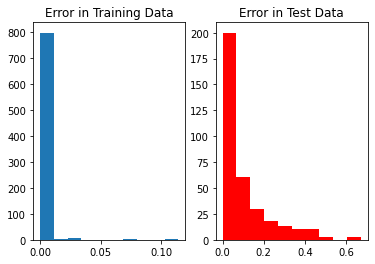

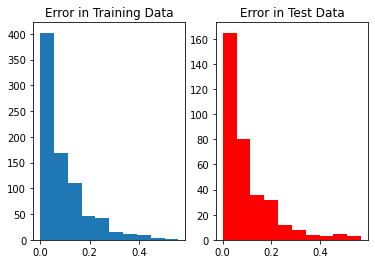

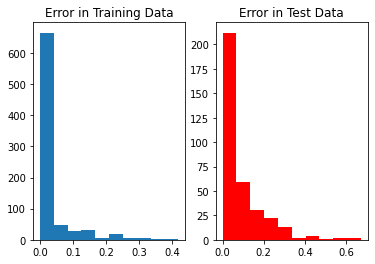

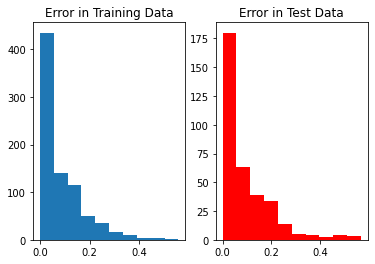

In [ ]:
#Let us try decision trees
from sklearn.tree import DecisionTreeRegressor


def build_predict_DT(df,i,j,k):
  dtree = DecisionTreeRegressor()
  X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df.iloc[:,i:j]), 
                                                      df.iloc[:,k], test_size=0.3, random_state=42)
  dtree.fit(X_train, y_train)  
  pred = dtree.predict(X_test)
  pred_train=dtree.predict(X_train)
  print('RMSE:',np.sqrt(mean_squared_error(y_test, pred)))
  print('MAE:',mean_absolute_error(y_test, pred))
  fig=plt.figure()
  plt.subplot(1,2,1)
  plt.title('Error in Training Data')
  plt.hist(abs(y_train-pred_train))
  plt.subplot(1,2,2)
  plt.title('Error in Test Data')
  plt.hist(abs(y_test-pred),color='red')
  print('\n')
  
  #Tune depth parameter
  #Grid search to find best parameters from the training data  
  
  decision_tree_optimized = GridSearchCV(dtree,param_grid = {'max_depth': range(1, 11),
                                                           'min_samples_split': range(10, 60, 10)},
                                                            cv=5,n_jobs=1,
                                                          scoring='neg_mean_squared_error')
  
  decision_tree_optimized.fit(X_train,y_train)
  
  #Once the best ones are found, create a KNN regressor with those parameters
  optimized_model_test=DecisionTreeRegressor(max_depth=decision_tree_optimized.best_estimator_.max_depth,
                                                   min_samples_split = decision_tree_optimized.best_estimator_.min_samples_split)
  
  #Fit the optimized decision tree, get the RMSE and MAE
  optimized_model_test.fit(X_train, y_train)
  y_pred_test = optimized_model_test.predict(X_test)
  print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print('MAE:',mean_absolute_error(y_test, y_pred_test))
  y_pred_train=optimized_model_test.predict(X_train)
  fig=plt.figure()
  plt.subplot(1,2,1)
  plt.title('Error in Training Data')
  plt.hist(abs(y_train-y_pred_train))
  plt.subplot(1,2,2)
  plt.title('Error in Test Data')
  plt.hist(abs(y_test-y_pred_test),color='red')
  print('\n')
  importance = optimized_model_test.feature_importances_
  feature=[]
  score=[]
  for i,v in enumerate(importance):
    feature=feature + [i]
    score=score + [v]
    print('Feature:' + str(i) + ' Score:' + str(v))

  print('\n')
  data=list(zip(feature,score))
  return data




#Optimize the model
data=build_predict_DT(df,0,32,32)
relevant_features=[x[0] for x in data if x[1] > 0] + [32]
print(relevant_features)
df_new = df.iloc[:,relevant_features]
build_predict_DT(df_new,0,len(relevant_features)-1,len(relevant_features)-1)
#relevant_features=[0,1,7]
#df_new = df_new.iloc[:,relevant_features]
#build_predict_DT(df_new,0,3,3)














 





    








Whole Dataset: 
RMSE: 0.14420287612100235
MAE: 0.10094058912931035


RMSE: 0.14433668265524846
MAE: 0.09347076203735631


(array([198.,  56.,  36.,  26.,  11.,  10.,   4.,   3.,   2.,   2.]),
 array([0.        , 0.06258785, 0.1251757 , 0.18776355, 0.2503514 ,
        0.31293925, 0.3755271 , 0.43811496, 0.50070281, 0.56329066,
        0.62587851]),
 <a list of 10 Patch objects>)

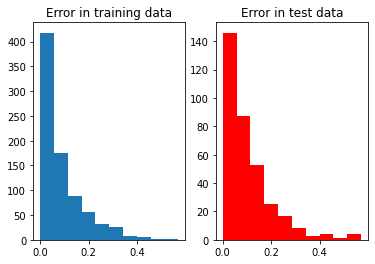

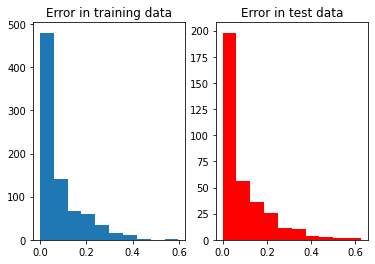

In [ ]:
#See if we can predict actual_productivity from all the other variables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

def build_predict_KNN(df_gwp,i,j,k):
    

    X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(df_gwp.iloc[:,i:j]), 
    df_gwp.iloc[:,k], test_size=0.3, random_state=42)
    
    #Parameters for KNN
    parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
    knn_model = neighbors.KNeighborsRegressor()

    #Grid search to find best parameters from the training data  
    optimized_model_train = GridSearchCV(knn_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
    optimized_model_train.fit(X_train, y_train)

    #Once the best ones are found, create a KNN regressor with those parameters
    optimized_model_test=neighbors.KNeighborsRegressor(
        n_neighbors=optimized_model_train.best_estimator_.n_neighbors,
        metric = optimized_model_train.best_estimator_.metric,
        weights = optimized_model_train.best_estimator_.weights)

    #Fit the KNN, get the RMSE and MAE
    optimized_model_test.fit(X_train, y_train)
    y_pred_test = optimized_model_test.predict(X_test)
    print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('MAE:',mean_absolute_error(y_test, y_pred_test))
    y_pred_train=optimized_model_test.predict(X_train)
    data=[y_train, y_pred_train, y_test, y_pred_test]
    return data

print('Whole Dataset: ')

cols=list(df_gwp.columns.values)
cols.pop(cols.index('actual_productivity'))
df=df_gwp[cols+['actual_productivity']]
data=build_predict_KNN(df,0,32,32)

print('\n')
fig=plt.figure()
plt.subplot(1,2,1)
plt.title('Error in training data')
plt.hist(abs(np.array(data[0])-np.array(data[1])))
plt.subplot(1,2,2)
plt.title('Error in test data')
plt.hist(abs(np.array(data[2])-np.array(data[3])),color='red')


#With lesser features

f=[0,1,2,3,4,5,30,32]

df_new = df.iloc[:,f]

data=build_predict_KNN(df_new,0,7,7)
fig=plt.figure()
plt.subplot(1,2,1)
plt.title('Error in training data')
plt.hist(abs(np.array(data[0])-np.array(data[1])))
plt.subplot(1,2,2)
plt.title('Error in test data')
plt.hist(abs(np.array(data[2])-np.array(data[3])),color='red')


#teams= sorted(df_gwp['team'].unique())



#for i in range(0,len(teams)):
#  df=df_gwp[df_gwp['team']==teams[i]]
#  print('Team ',teams[i],' ',':')
#  data=build_predict_KNN(df,0,9,10)
#  fig=plt.figure()
#  plt.subplot(1,2,1)
#  plt.hist(abs(np.array(data[0])-np.array(data[1])))
#  plt.title('Error in training data')
#  plt.subplot(1,2,2)
#  plt.hist(abs(np.array(data[2])-np.array(data[3])),color='red')
#  plt.title('Error in test data')
#  print('\n')
  







In [ ]:
df=df.set_index([pd.Index(list(range(0,1160)))])
#Create a category column that is based on productivity. 
#Category ranges from 1 to 4 with 4 being least productive
#and 1 being most productive.
#See if a bayes classifier and predict category accurately based
#on numerical columns as as above

#Accuaracy of 0.67

df['actual_productivity'] = np.zeros(len(df))
df['actual_productivity'] = df_gwp['actual_productivity']
df['category'] = np.zeros(len(df))

for i in range(0,len(df)):
    if df['actual_productivity'][i] >= 0 and df['actual_productivity'][i] <= 0.75:
        df['category'][i]=int(1)
        
    else:
        df['category'][i]=int(0)

df=df.drop(['actual_productivity'],axis=1)


clf=MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:32], 
df.iloc[:,32], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

#####

df_new=df.drop(['smv','no_of_workers','over_time','sewing'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,0:28], 
df_new.iloc[:,28], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

#####

clf = GaussianNB()

df_numerical=df[['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','category']]
X_train, X_test, y_train, y_test = train_test_split(
scaler.fit_transform(df_numerical.iloc[:,0:9]), 
df_numerical.iloc[:,9], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

df_new=df_numerical.drop(['smv','no_of_workers','over_time'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
scaler.fit_transform(df_new.iloc[:,0:6]), 
df_new.iloc[:,6], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

from sklearn.naive_bayes import CategoricalNB

clf=CategoricalNB()

df_categorical=df.drop(['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_categorical.iloc[:,0:23], 
df_categorical.iloc[:,23], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

df_categorical = df_categorical.drop(['sewing'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_categorical.iloc[:,0:22], 
df_categorical.iloc[:,22], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))












0.4885057471264368
[[102 104]
 [ 74  68]]
0.47701149425287354
[[123  83]
 [ 99  43]]
0.5862068965517241
[[192  14]
 [130  12]]
0.5948275862068966
[[196  10]
 [131  11]]
0.6063218390804598
[[158  48]
 [ 89  53]]
0.5804597701149425
[[157  49]
 [ 97  45]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:32], 
df.iloc[:,32], test_size=0.3, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_test_pred=clf.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

df_new=df.drop(['smv','no_of_workers','over_time','sewing'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,0:28], 
df_new.iloc[:,28], test_size=0.3, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_test_pred=clf.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

df_numerical=df[['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','category']]
df_new=df_numerical.drop(['smv','no_of_workers','over_time'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
scaler.fit_transform(df_new.iloc[:,0:6]), 
df_new.iloc[:,6], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

df_categorical=df.drop(['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers'],axis=1)

df_categorical = df_categorical.drop(['sewing'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_categorical.iloc[:,0:22], 
df_categorical.iloc[:,22], test_size=0.3, random_state=42)

clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))





0.6264367816091954
[[193  13]
 [117  25]]
0.6293103448275862
[[174  32]
 [ 97  45]]
0.6206896551724138
[[192  14]
 [118  24]]
0.5862068965517241
[[165  41]
 [103  39]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from scipy.stats.stats import pearsonr

columns=['targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers']
collinear_feature=[]
for i in columns:
  for j in columns:
    if(i != j):
      if(abs(pearsonr(df[i],df[j])[0]) > 0.7):
        collinear_feature = collinear_feature + [[i,j]]
print(collinear_feature)

[['smv', 'no_of_workers'], ['over_time', 'no_of_workers'], ['no_of_workers', 'smv'], ['no_of_workers', 'over_time']]


In [ ]:
from scipy.stats.stats import pearsonr
columns= list(df.columns)
columns.pop(32)
collinear_feature=[]
for i in columns:
  for j in columns:
    if(i != j):
      if(abs(pearsonr(df[i],df[j])[0]) > 0.7):
        collinear_feature = collinear_feature + [[i,j]]
print(collinear_feature)

[['smv', 'no_of_workers'], ['smv', 'finishing'], ['smv', 'sewing'], ['over_time', 'no_of_workers'], ['no_of_workers', 'smv'], ['no_of_workers', 'over_time'], ['no_of_workers', 'finishing'], ['no_of_workers', 'sewing'], ['finishing', 'smv'], ['finishing', 'no_of_workers'], ['finishing', 'sewing'], ['sewing', 'smv'], ['sewing', 'no_of_workers'], ['sewing', 'finishing']]


In [ ]:
from scipy.stats.stats import pearsonr

columns=['Feb',
 'Jan',
 'March',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'finishing',
 'sewing',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12]

collinear_feature=[]
for i in columns:
  for j in columns:
    if(i != j):
      if(abs(pearsonr(df_categorical[i],df_categorical[j])[0]) > 0.9) :
        collinear_feature = collinear_feature + [[i,j]]
print(collinear_feature)

[['finishing', 'sewing'], ['sewing', 'finishing']]
